# Exploratory Data Analysis (EDA)
This notebook aims to explore and analyze the dataset by performing initial data cleaning and generating key visualizations to understand the distribution and patterns in the data.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the cleaned master dataset
master_df = pd.read_csv('dataset/cleaned_master_dataset.csv')

# Quick check of the dataset shape
print(master_df.shape)

(1080905, 81)


## Basic Descriptive Statistics
Summary statistics are calculated to understand the central tendency and spread of the data. This includes measures such as mean, median, and standard deviation.

In [ ]:
# 1. Descriptive Statistics per Vehicle

# Calculate descriptive statistics for each vehicle
# This includes count, mean, std, min, 25%, 50%, 75%, and max for each sensor axis
descriptive_vehicle_stats = master_df.groupby('vehicle')[['acc_x_dashboard_left', 'acc_y_dashboard_left', 'acc_z_dashboard_left']].describe()

# Display the descriptive statistics
display(descriptive_vehicle_stats)

# Save the descriptive statistics to a CSV file
descriptive_vehicle_stats.to_csv('dataset/descriptive_vehicle_stats.csv')

acc_x_dashboard_left                                 \
                                  count      mean       std        min   
vehicle                                                                  
Fiat Bravo                     362648.0  0.257525  1.306369  -9.151631   
Fiat Palio                     343721.0  0.246039  1.314881  -8.111316   
Volkswagen Saveiro             374536.0  0.229567  1.429087 -10.735600   

                                                             \
                         25%       50%       75%        max   
vehicle                                                       
Fiat Bravo         -0.469503  0.226456  1.024479   7.599555   
Fiat Palio         -0.502543  0.225294  0.979468   8.826195   
Volkswagen Saveiro -0.495600  0.232597  0.964863  13.957495   

                   acc_y_dashboard_left            ...                       \
                                  count      mean  ...       75%        max   
vehicle                                            ...                        
Fiat Bravo                     362648.0 -0.145169  ...  0.683282  12.183075   
Fiat Palio                     343721.0 -0.144058  ...  0.758124  14.567608   
Volkswagen Saveiro             374536.0 -0.140564  ...  0.660022  18.276868   

                   acc_z_dashboard_left                                \
                                  count      mean       std       min   
vehicle                                                                 
Fiat Bravo                     362648.0  9.782362  1.289326 -1.027292   
Fiat Palio                     343721.0  9.823909  2.214910 -8.036258   
Volkswagen Saveiro             374536.0  9.788493  1.752436 -9.491693   

                                                              
                         25%       50%        75%        max  
vehicle                                                       
Fiat Bravo          9.205526  9.796894  10.385867  19.458144  
Fiat Palio          8.820064  9.825628  10.842023  34.504815  
Volkswagen Saveiro  9.029851  9.791207  10.558549  24.665544  

[3 rows x 24 columns]

In [ ]:
# 2. Pivot Table - Aggregating Sensor Data per Vehicle and Scenario

# Create a pivot table to aggregate sensor data per vehicle and scenario
pivot_vehicle_scenario = master_df.pivot_table(
    values=['acc_x_dashboard_left', 'acc_y_dashboard_left', 'acc_z_dashboard_left'],
    index='vehicle',
    columns='scenario',
    aggfunc='mean'
)

# Display the pivot table
display(pivot_vehicle_scenario)

# Save the pivot table to a CSV file
pivot_vehicle_scenario.to_csv('dataset/pivot_vehicle_scenario.csv')

acc_x_dashboard_left                        \
scenario                     Scenario 1 Scenario 2 Scenario 3   
vehicle                                                         
Fiat Bravo                    -0.136552   0.516208   0.440124   
Fiat Palio                    -0.223821   0.576928   0.458980   
Volkswagen Saveiro            -0.171308   0.617304   0.318362   

                   acc_y_dashboard_left                        \
scenario                     Scenario 1 Scenario 2 Scenario 3   
vehicle                                                         
Fiat Bravo                    -0.036261  -0.242636  -0.159512   
Fiat Palio                     0.019999  -0.270474  -0.203715   
Volkswagen Saveiro             0.015106  -0.239721  -0.235623   

                   acc_z_dashboard_left                        
scenario                     Scenario 1 Scenario 2 Scenario 3  
vehicle                                                        
Fiat Bravo                     9.734223   9.810991   9.808799  
Fiat Palio                     9.710462   9.910696   9.866013  
Volkswagen Saveiro             9.719331   9.828431   9.835577

In [ ]:
# 3. Identifying Outliers (Highest Z-axis Vibrations)

# Identify the top 10 highest Z-axis vibrations (outliers)
outliers_high_vibration = master_df[['timestamp', 'vehicle', 'acc_z_dashboard_left']].nlargest(10, 'acc_z_dashboard_left')

# Display the outliers
display(outliers_high_vibration)

# Save the outliers to a CSV file
outliers_high_vibration.to_csv('dataset/outliers_high_vibration.csv')

,timestamp,vehicle,acc_z_dashboard_left
786766,1.577396e+09,Fiat Palio,34.504815
951398,1.577398e+09,Fiat Palio,33.042202
1032032,1.577399e+09,Fiat Palio,31.527925
963827,1.577398e+09,Fiat Palio,31.055015
963830,1.577398e+09,Fiat Palio,30.195496
963831,1.577398e+09,Fiat Palio,29.975230
795790,1.577396e+09,Fiat Palio,27.973433
909550,1.577397e+09,Fiat Palio,27.918610
816952,1.577396e+09,Fiat Palio,27.099550
817236,1.577396e+09,Fiat Palio,26.829005


In [ ]:
# Identify the top 10 lowest Z-axis vibrations (negative spikes)
outliers_low_vibration = master_df[['timestamp', 'vehicle', 'acc_z_dashboard_left']].nsmallest(10, 'acc_z_dashboard_left')

# Display the negative spikes
display(outliers_low_vibration)

# Save the negative spikes to a CSV file
outliers_low_vibration.to_csv('dataset/outliers_low_vibration.csv')

,timestamp,vehicle,acc_z_dashboard_left
310749,1.577224e+09,Volkswagen Saveiro,-9.491693
1017381,1.577399e+09,Fiat Palio,-8.036258
1010754,1.577399e+09,Fiat Palio,-7.274901
915887,1.577398e+09,Fiat Palio,-6.823650
914100,1.577398e+09,Fiat Palio,-6.644085
113080,1.577220e+09,Volkswagen Saveiro,-6.418376
887271,1.577397e+09,Fiat Palio,-6.143697
917082,1.577398e+09,Fiat Palio,-5.928218
950936,1.577398e+09,Fiat Palio,-5.734288
1021451,1.577399e+09,Fiat Palio,-5.388271


## Speed Distribution by Vehicle
This visualization shows the distribution of vehicle speeds across different vehicle types. The KDE plot provides insight into the variability in speed for each vehicle.

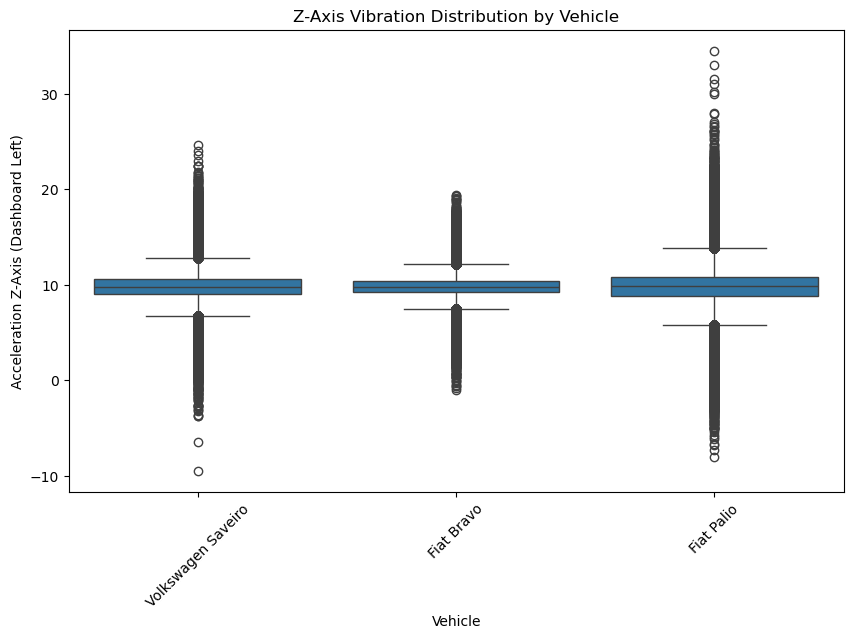

In [27]:
# 5. Visualization Example (Acceleration Z-Axis Distribution by Vehicle)

plt.figure(figsize=(10, 6))
sns.boxplot(x='vehicle', y='acc_z_dashboard_left', data=master_df)
plt.title('Z-Axis Vibration Distribution by Vehicle')
plt.xlabel('Vehicle')
plt.ylabel('Acceleration Z-Axis (Dashboard Left)')
plt.xticks(rotation=45)
plt.show()

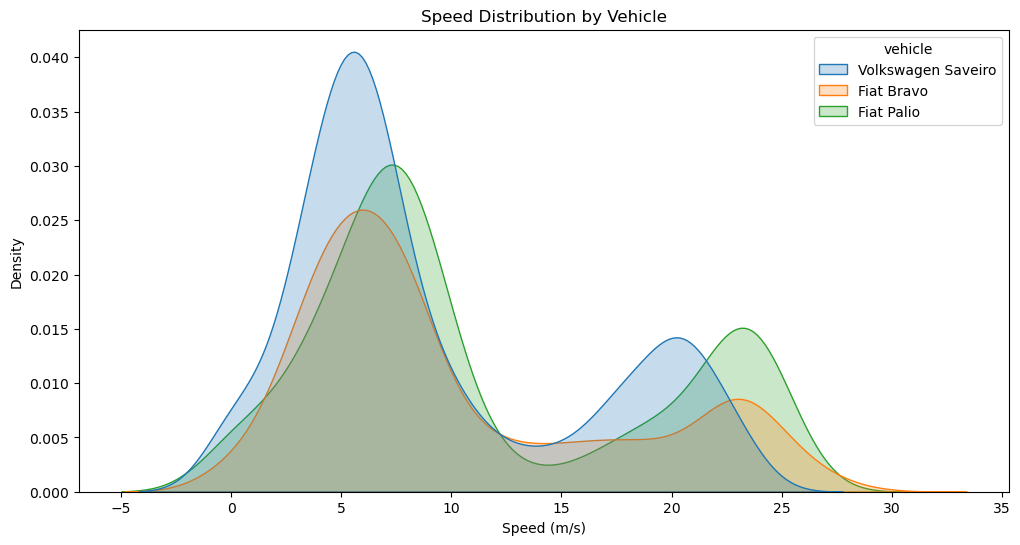

In [23]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=master_df, x='speed_meters_per_second', hue='vehicle', fill=True)
plt.title('Speed Distribution by Vehicle')
plt.xlabel('Speed (m/s)')
plt.ylabel('Density')
plt.savefig('plots/speed_distribution_by_vehicle.png')
plt.show()

,count,mean,std,min,25%,50%,75%,max
vehicle,,,,,,,,
Fiat Bravo,1766.0,10.204735,7.230223,0.003605,4.926013,7.534049,15.277126,28.548570
Fiat Palio,2108.0,11.288145,7.682918,0.001763,5.947153,8.242473,19.318575,25.690508
Volkswagen Saveiro,2380.0,9.178896,6.604133,0.003594,4.592874,6.591118,14.241782,23.584063


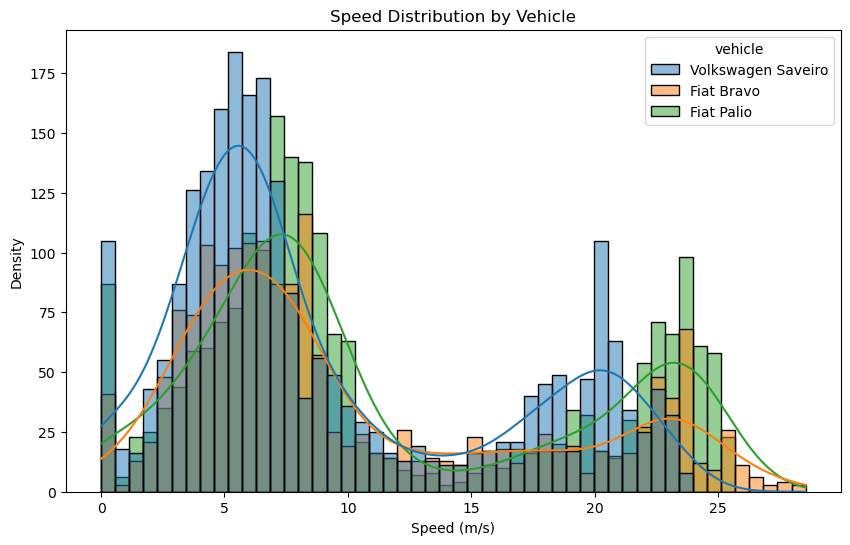

In [ ]:
# 7. Speed Distribution by Vehicle
speed_distribution_vehicle = master_df.groupby('vehicle')['speed_meters_per_second'].describe()
display(speed_distribution_vehicle)

plt.figure(figsize=(10, 6))
sns.histplot(data=master_df, x='speed_meters_per_second', hue='vehicle', kde=True, bins=50)
plt.title('Speed Distribution by Vehicle')
plt.xlabel('Speed (m/s)')
plt.ylabel('Density')
plt.show()